# Built-in linear stability analysis 

In [11]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
%matplotlib inline

import pyqg

In [12]:
m = pyqg.LayeredModel(nx=256, nz = 2, U = [.01, -.01], V = [0., 0.], H = [1., 1.],
                              L=2*pi,beta=1.5, rd=1./20., rek=0.05, f=1.,delta=1.)

INFO:  Logger initialized
INFO:  Kernel initialized


To perform linear stability analysis, we simply call pyqg's built-in method    ```       stability_analysis```:

In [3]:
evals,evecs = m.stability_analysis()

The eigenvalues are stored in ```omg```, and the eigenctors in ```evec```. For plotting purposes, we use fftshift to reorder the entries

In [4]:
evals = np.fft.fftshift(evals.imag,axes=(0,))

k,l = m.k*m.radii[1], np.fft.fftshift(m.l,axes=(0,))*m.radii[1]

It is also useful to analyze the fasted-growing mode:

In [5]:
argmax = evals[m.Ny/2,:].argmax()
evec = np.fft.fftshift(evecs,axes=(1))[:,m.Ny/2,argmax]
kmax = k[m.Ny/2,argmax]

x = np.linspace(0,4.*pi/kmax,100)
mag, phase = np.abs(evec), np.arctan2(evec.imag,evec.real) 

By default, the stability analysis above is performed without bottom friction, but the stability method also supports bottom friction:

In [6]:
evals_fric, evecs_fric = m.stability_analysis(bottom_friction=True)
evals_fric = np.fft.fftshift(evals_fric.imag,axes=(0,))

argmax = evals_fric[m.Ny/2,:].argmax()
evec_fric = np.fft.fftshift(evecs_fric,axes=(1))[:,m.Ny/2,argmax]
kmax_fric = k[m.Ny/2,argmax]

mag_fric, phase_fric = np.abs(evec_fric), np.arctan2(evec_fric.imag,evec_fric.real) 

## Plotting growth rates

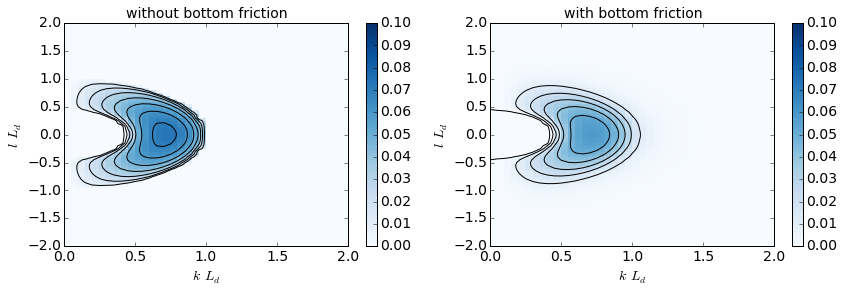

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.contour(k,l,evals,colors='k')
plt.pcolormesh(k,l,evals,cmap='Blues')
plt.colorbar()
plt.xlim(0,2.); plt.ylim(-2.,2.)
plt.clim([0.,.1])
plt.xlabel(r'$k \, L_d$'); plt.ylabel(r'$l \, L_d$') 
plt.title('without bottom friction')

plt.subplot(122)
plt.contour(k,l,evals_fric,colors='k')
plt.pcolormesh(k,l,evals_fric,cmap='Blues')
plt.colorbar()
plt.xlim(0,2.); plt.ylim(-2.,2.)
plt.clim([0.,.1])
plt.xlabel(r'$k \, L_d$'); plt.ylabel(r'$l \, L_d$') 
plt.title('with bottom friction')

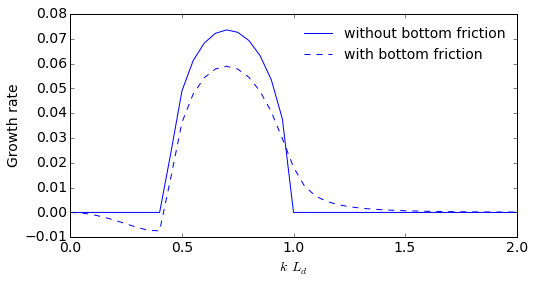

In [8]:
plt.figure(figsize=(8,4))
plt.plot(k[m.Ny/2,:],evals[m.Ny/2,:],'b',label='without bottom friction')
plt.plot(k[m.Ny/2,:],evals_fric[m.Ny/2,:],'b--',label='with bottom friction')
plt.xlim(0.,2.)
plt.legend()
plt.xlabel(r'$k\,L_d$')
plt.ylabel(r'Growth rate')

## Plotting the wavestructure of the most unstable modes

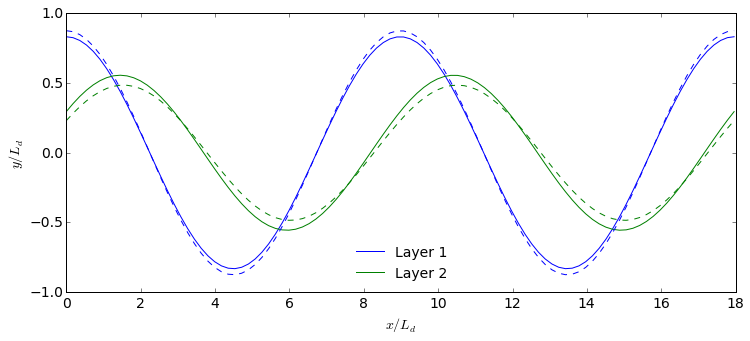

In [9]:
plt.figure(figsize=(12,5))
plt.plot(x,mag[0]*np.cos(kmax*x + phase[0]),'b',label='Layer 1')
plt.plot(x,mag[1]*np.cos(kmax*x + phase[1]),'g',label='Layer 2')
plt.plot(x,mag_fric[0]*np.cos(kmax_fric*x + phase_fric[0]),'b--')
plt.plot(x,mag_fric[1]*np.cos(kmax_fric*x + phase_fric[1]),'g--')
plt.legend(loc=8)
plt.xlabel(r'$x/L_d$'); plt.ylabel(r'$y/L_d$')

This calculation shows the classic phase-tilting of baroclinic unstable waves (e.g. [Vallis 2006](http://www.vallisbook.org) ).